## Efficient Low Noise Neural Network

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
from IPython.display import Image
from nltk.corpus import stopwords
import pprint as pp
import random
import time
import sys
import os
try:
   import cPickle as cPickle
except:
   import pickle as cPickle

### Load data

In [5]:
data = pd.read_csv('dataset/processed_pos_neg_reviews.csv', encoding='latin-1')

In [6]:
data.head()

,ProductId,Rating,Summary,Text,Label
0,B006CMVE7S,4,No taste with filtered bottle,I guess some of you may have guessed this befo...,POSITIVE
1,B00813GRG4,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,NEGATIVE
2,B00570H26I,4,"Delicious pasta, but not for peanut allergies!",I have to agree with the previous posters that...,POSITIVE
3,B000UA0QIQ,2,Cough Medicine,If you are looking for the secret ingredient i...,NEGATIVE
4,B000GBOM0C,5,great treat,My pups love this chicken/rice treat(10lb Russ...,POSITIVE


In [7]:
data.Label.value_counts()

POSITIVE    82037
NEGATIVE    82037
Name: Label, dtype: int64

### Data Preparation

Training Data

In [8]:
# first 70000 reviews
training_data = data[0:70000].reset_index(drop=True)
training_data_length = training_data.shape[0]
training_data.head()

,ProductId,Rating,Summary,Text,Label
0,B006CMVE7S,4,No taste with filtered bottle,I guess some of you may have guessed this befo...,POSITIVE
1,B00813GRG4,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,NEGATIVE
2,B00570H26I,4,"Delicious pasta, but not for peanut allergies!",I have to agree with the previous posters that...,POSITIVE
3,B000UA0QIQ,2,Cough Medicine,If you are looking for the secret ingredient i...,NEGATIVE
4,B000GBOM0C,5,great treat,My pups love this chicken/rice treat(10lb Russ...,POSITIVE


Shape of training data

In [9]:
pp.pprint(training_data.shape)
pp.pprint(training_data.Label.shape)

(70000, 5)
(70000,)


Validation Data

In [10]:
# middle 6019 reviews
validation_data = data[70000:76019].reset_index(drop=True)
validation_data_length = validation_data.shape[0]
validation_data.head()

,ProductId,Rating,Summary,Text,Label
0,B001D0KG3W,5,Italian blend coffee,Great coffee - much better price when you orde...,POSITIVE
1,B001VJ0B0I,2,"Gross by-products, sugar, and food colorings--...",I completely agree that the ingredients for th...,NEGATIVE
2,B0005XMOI8,5,Best Everyday Hot tea,I have had nothing but Red Rose growing up nea...,POSITIVE
3,B001VJ0B0I,2,Read the Ingredient List,Make sure you read the list of ingredients bef...,NEGATIVE
4,B000FFPXJ8,5,Good stuff,These oatmeal cups are extremely convenient an...,POSITIVE


Shape of validation data

In [11]:
pp.pprint(validation_data.shape)
pp.pprint(validation_data.Label.shape)

(6019, 5)
(6019,)


Testing data

In [12]:
# last 6018 reviews
test_data = data[76019:82037].reset_index(drop=True)
test_data_length = test_data.shape[0]
test_data.head()

,ProductId,Rating,Summary,Text,Label
0,B003NV2IG2,2,Inconsistent Taste,I first tasted Annie Chun's seaweed three year...,NEGATIVE
1,B0001JXBE2,4,These are *not* sproutable oats!,"I have been searching for unstabilized, organi...",POSITIVE
2,B003NV2IG2,2,"Nothing like sushi, that's for sure","For me, these were a total bust. The texture s...",NEGATIVE
3,B000LKTPV4,4,"Organic, delicious, and fair trade. Can't ask ...",Loved it. It's maybe the best white chocolate ...,POSITIVE
4,B003NV2IG2,2,Mediocre for Seaweed Snacking,This is one of many varieties of seaweed snack...,NEGATIVE


Shape of Testing data

In [13]:
pp.pprint(test_data.shape)
pp.pprint(test_data.Label.shape)

(6018, 5)
(6018,)


### Analysing Ineffiencies in Network

#### Pruning

Given the volume of our data, the training speed is still pretty low and have to find ways to increment it. Since, effectively, **0 multiplied by any number is still 0**, we could find a way to disregard inputs that are **0** and only consider those with **1**. 

This will improve our computation time allowing us to train on even more data.

#### Eficient and Low Noise SentimentalNetwork

In [14]:
from toolkit.networks import EfficientLowNoiseSentimentalNeuralNetwork

In [64]:
nnetEffLN = EfficientLowNoiseSentimentalNeuralNetwork(training_data, validation_data, num_hidden_nodes=10, num_epochs=20, learning_rate=0.001, min_count=10, polar_cutoff=0.2)

Make sure you check for any biasness before training. We should have a **50-50** chance for both `POSITIVE` and `NEGATIVE` reviews. This is because the network hasn't even trained yet and what it is outputing is basically guesswork.

**NB** In general starting from a non-biased point like this is very desirable.

In [66]:
nnetEffLN.test(test_data)

Progress:99.9% Speed(reviews/sec):4693. #Correct:2861 #Tested:6018 Testing Accuracy:47.5%

Get the confusion matrix for the test data

In [54]:
nnetEffLN.get_confusion_matrix()

,EP,LR,HLU,TP,FP,TN,FN,RECALL,PRECISION,F1-S,MCC-S,TE-ACC,TR-ACC,VA-ACC
0,20,0.001,10,1729.0,1877.0,1132.0,1280.0,57.46095,47.947865,52.275132,52.275132,47.540711,None,None


In [67]:
nnetEffLN.train()

Epoch: 0 Progress: 99.9% Speed(samples/sec): 4748. #Correct: 41701 #Trained: 70000 Training Accuracy: 59.5%
Epoch: 1 Progress: 99.9% Speed(samples/sec): 4605. #Correct: 49415 #Trained: 70000 Training Accuracy: 70.5%
Epoch: 2 Progress: 99.9% Speed(samples/sec): 4176. #Correct: 51545 #Trained: 70000 Training Accuracy: 73.6%
Epoch: 3 Progress: 99.9% Speed(samples/sec): 4192. #Correct: 52845 #Trained: 70000 Training Accuracy: 75.4%
Epoch: 4 Progress: 99.9% Speed(samples/sec): 4465. #Correct: 53762 #Trained: 70000 Training Accuracy: 76.8%
Epoch: 5 Progress: 99.9% Speed(samples/sec): 4380. #Correct: 54417 #Trained: 70000 Training Accuracy: 77.7%
Epoch: 6 Progress: 99.9% Speed(samples/sec): 4241. #Correct: 55006 #Trained: 70000 Training Accuracy: 78.5%
Epoch: 7 Progress: 99.9% Speed(samples/sec): 4463. #Correct: 55502 #Trained: 70000 Training Accuracy: 79.2%
Epoch: 8 Progress: 99.9% Speed(samples/sec): 4369. #Correct: 56008 #Trained: 70000 Training Accuracy: 80.0%
Epoch: 9 Progress: 99.9% Spe

Network has already been trained, and obviously we now don't expect a **50-50** performance but something much better if indeed the newtork has learned.

In [65]:
nnetEffLN.test(test_data)

Progress:99.9% Speed(reviews/sec):4205. #Correct:2861 #Tested:6018 Testing Accuracy:47.5%

Get the confusion matrix for the test data

In [62]:
nnetEffLN.get_confusion_matrix()

,EP,LR,HLU,TP,FP,TN,FN,RECALL,PRECISION,F1-S,MCC-S,TE-ACC,TR-ACC,VA-ACC
0,20,0.001,10,2513.0,472.0,2537.0,496.0,83.516118,84.187605,83.850517,83.850517,83.914922,85.184286,83.103506


 A graph of validation/training loss against the no. of epochs. 

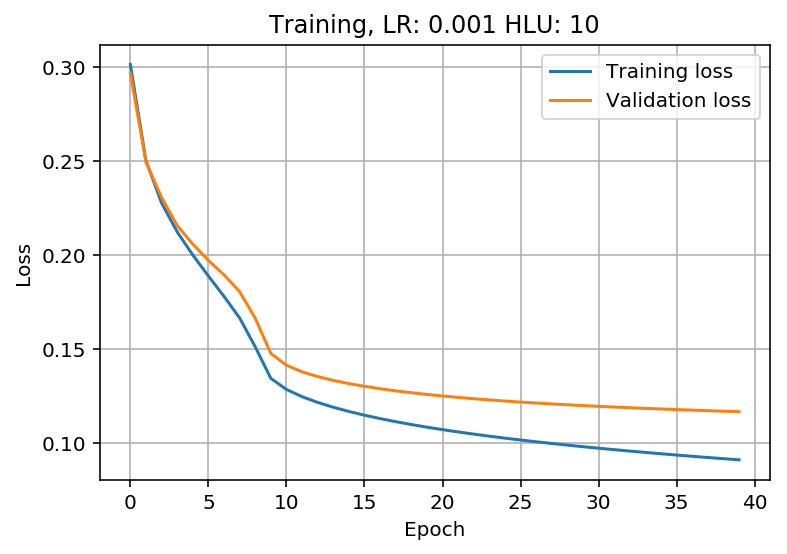

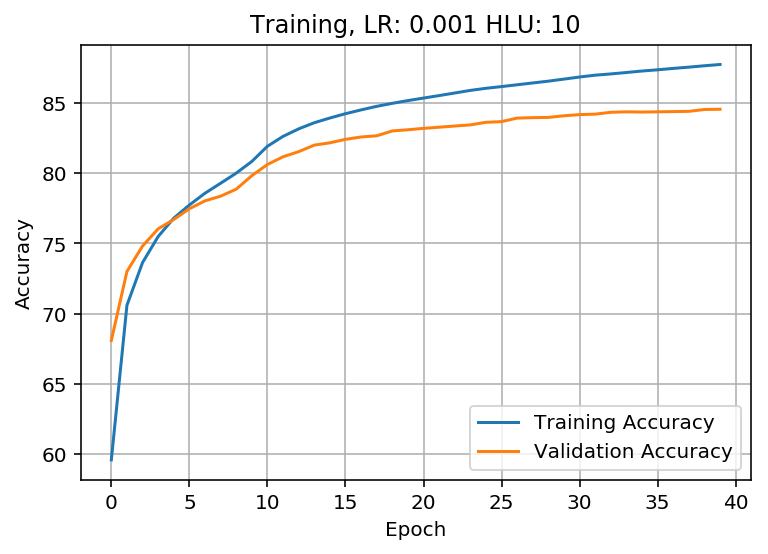

In [63]:
nnetEffLN.visualise_training()

#### Predict sentiment of unseen data

In [ ]:
nnetEffLN.predict("This product sucks!! I bought it and it proved disgusting. Do not buy.")

In [ ]:
nnetEffLN.predict("I enjoyed it. It is a very awesome product")

#### If satisfied with the results, update our training data over time. We will use this for analysis later.

In [19]:
def ensure_dir(file_path):
    directory = os.path.dirname(file_path)
    if not os.path.exists(directory):
        os.makedirs(directory)

In [ ]:
def save_confusion_matrix_to_csv(df, csvFilePath, sep=","):
    if not os.path.isfile(csvFilePath):
        df.to_csv(csvFilePath, mode='a', index=False, sep=sep)
    else:
        df.to_csv(csvFilePath, mode='a', index=False, sep=sep, header=False)

In [ ]:
# update training data to disk
csv_train_filepath = "training/XXXsentiment_cf_matrix_lr.csv"
ensure_dir(csv_train_filepath)
df = nnetEffLN.get_confusion_matrix()
save_confusion_matrix_to_csv(df, csv_train_filepath)

Show training data and progress

In [ ]:
# load our saved data
csv_train_filepath = "training/sentiment_cf_matrix_lr.csv"
training_metrics = pd.read_csv(csv_train_filepath, encoding='latin-1')

In [ ]:
# Show first 10 results
training_metrics.tail(10)

### Data Analysis

##### Listing of short codes


- EP: No. of Epochs  
- LR: Learning Rate
- HLU: No. of Hiddel Layer Units
- TP: True Positive
- FP - False Positive
- TN: - True Negative
- FN: - False Negative
- F1-S : - F1-Score
- MCC-S: - Matthews Correlation Coefficient
- TE-ACC: Testing Accuracy for last Epoch
- TR-ACC: Training Accuracy for last Epoch
- VA-ACC: Validation Accuracy for last Epoch

##### Tabulation of training results for different hyper-parameters.

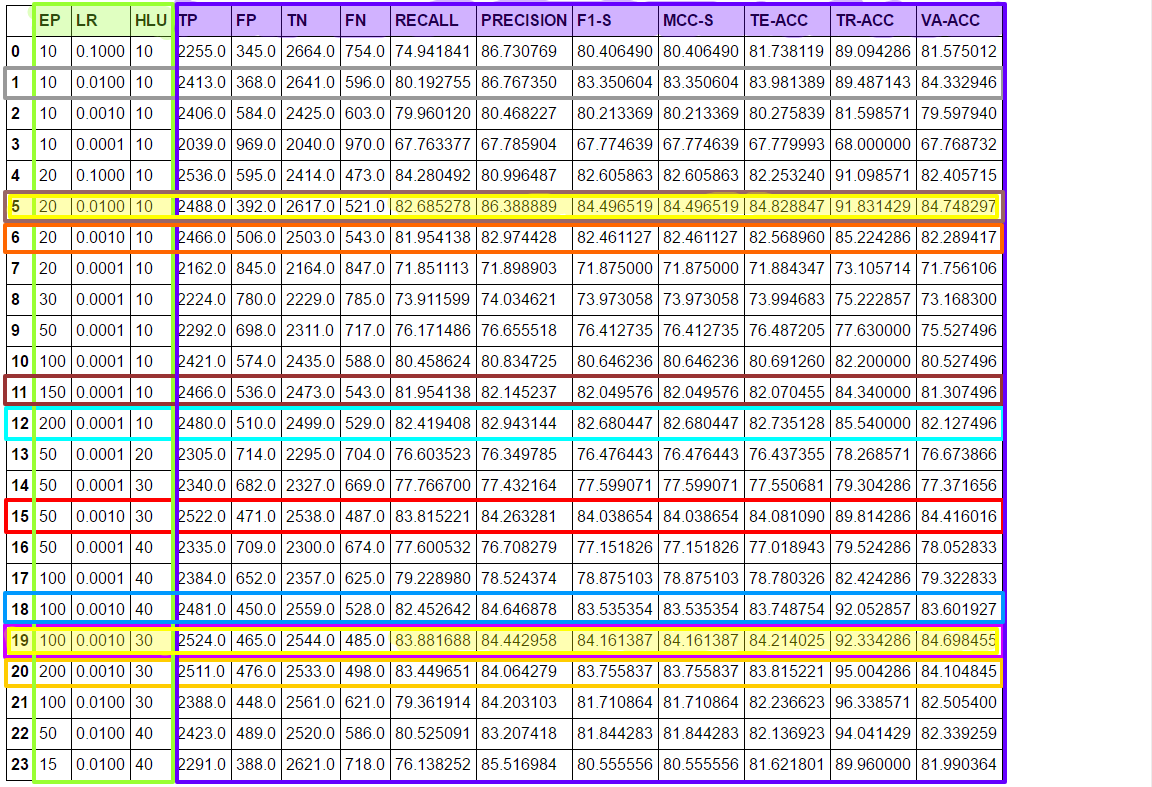

In [47]:
Image(filename='training/tables/results_final.png')

### Saved trained Model

In [38]:
# save the model to disk
model_trained_filepath = 'models/pip3/se_model_lr0.01epoch_20hlu_10.sav'
ensure_dir(model_trained_filepath)
cPickle.dump(nnetEffLN, open(model_trained_filepath, 'wb'), protocol=3)

### Load trained Model

In [39]:
# load the model from disk
model_trained_filepath = 'models/pip3/se_model_lr0.01epoch_20hlu_10.sav'
loaded_model = cPickle.load(open(model_trained_filepath, 'rb'))

In [40]:
loaded_model

#### Predict sentiment of unseen data

Ensure that the results for loaded model are same as for the pre-saved model

In [41]:
loaded_model.predict("This product sucks!! I bought it and it proved disgusting. Do not buy.")

array([ 0.03909223])

In [44]:
loaded_model.predict("I enjoyed it. It is a very awesome product")

array([ 0.89147904])

In [43]:
loaded_model.predict("I hate how this product was badly packaged. It was delivered while damaged")

array([ 0.21881516])

### Deploy saved trained Model

At this point the model can be deployed and distributed as a service. It can be deployed as a web application, mobile app, smart personal asistants such as `Google Now`,`Google Home`, `Amazon Echo` e.t.c.